In [1]:
# Normalise features
# Find the optimal parameters C (inverse regulalisation strengths)
# Find the best features to predict stock movement (up or down)
# Convert probability into absolute values (stock % increase/decrease)
# SVC, RandomForest, MinMax, LongShortTermMemory

%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

#import classes
from company import Company
from onestep_baseline_company import OneStepBaselineCompany
from onestep_lstm_company import OneStepLSTMCompany
from multistep_baseline_company import MultiStepBaselineCompany
from multistep_lstm_company import MultiStepLSTMCompany

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')


Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
"""start_train_date = "01/01/2015"
end_train_start_test_date = "10/01/2018"
end_test_date = "20/01/2019"
company_baseline = OneStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date)
company_baseline.train()
predictions = company_baseline.predict()
display(predictions)
company_baseline.plot(predictions)
rmse_score = company_baseline.score(metric="rmse", predictions=predictions)
print("Baseline RMSE Score: %.3f US dollar" % rmse_score)
trend_score = company_baseline.score(metric="trend", predictions=predictions)
print("Baseline trend Score: %.1f %%" % (trend_score*100))"""


'start_train_date = "01/01/2015"\nend_train_start_test_date = "10/01/2018"\nend_test_date = "20/01/2019"\ncompany_baseline = OneStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date)\ncompany_baseline.train()\npredictions = company_baseline.predict()\ndisplay(predictions)\ncompany_baseline.plot(predictions)\nrmse_score = company_baseline.score(metric="rmse", predictions=predictions)\nprint("Baseline RMSE Score: %.3f US dollar" % rmse_score)\ntrend_score = company_baseline.score(metric="trend", predictions=predictions)\nprint("Baseline trend Score: %.1f %%" % (trend_score*100))'

Preprocessing the data
Retrieved price series and raw pd from disk


D:\Github\Hons-Project\code\company.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  relevant_series_range.dropna(inplace=True)


Preprocessed data in  0.004585536321004232 mins


2018-01-11    [43.31, 43.31, 43.31]
2018-01-12    [42.82, 42.82, 42.82]
2018-01-16    [42.81, 42.81, 42.81]
2018-01-17    [42.92, 42.92, 42.92]
2018-01-18    [44.26, 44.26, 44.26]
2018-01-19    [43.99, 43.99, 43.99]
2018-01-22    [42.75, 42.75, 42.75]
2018-01-23    [42.88, 42.88, 42.88]
2018-01-24    [43.95, 43.95, 43.95]
2018-01-25    [43.08, 43.08, 43.08]
2018-01-26    [43.01, 43.01, 43.01]
2018-01-29    [43.67, 43.67, 43.67]
2018-01-30    [43.29, 43.29, 43.29]
2018-01-31    [41.67, 41.67, 41.67]
2018-02-01    [43.72, 43.72, 43.72]
2018-02-02    [42.49, 42.49, 42.49]
2018-02-05    [40.82, 40.82, 40.82]
2018-02-06       [39.4, 39.4, 39.4]
2018-02-07    [43.88, 43.88, 43.88]
2018-02-08    [42.01, 42.01, 42.01]
2018-02-09       [40.0, 40.0, 40.0]
2018-02-12    [40.41, 40.41, 40.41]
2018-02-13    [42.19, 42.19, 42.19]
2018-02-14    [42.63, 42.63, 42.63]
2018-02-15    [43.45, 43.45, 43.45]
2018-02-16       [43.5, 43.5, 43.5]
2018-02-20    [44.21, 44.21, 44.21]
2018-02-21       [44.9, 44.9

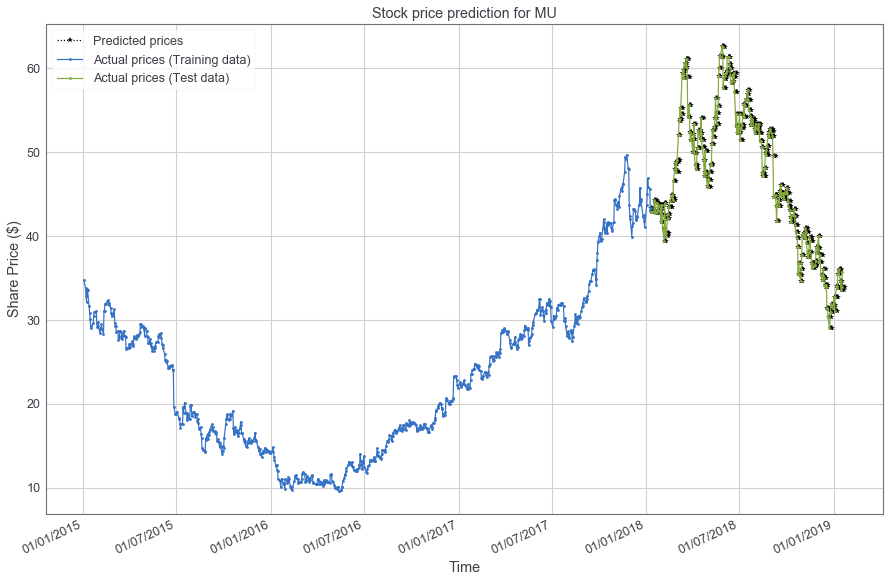

APRE:  0.023783824506645308
APRE:  0.03406126277349904
APRE:  0.04198672259283249


[0.023783824506645308, 0.03406126277349904, 0.04198672259283249]

In [4]:
# load dataset
start_train_date = "01/01/2018"
end_train_start_test_date = "01/02/2018"
end_test_date = "01/03/2018"

start_train_date = "01/01/2015"
end_train_start_test_date = "10/01/2018"
end_test_date = "20/01/2019"
multi_step_baseline = MultiStepBaselineCompany("MU", start_train_date, end_train_start_test_date, end_test_date, 
                                               n_lag=1, n_seq=3, n_batch="full_batch", tech_indicators=["price"], model_type="vanilla")
predictions = multi_step_baseline.predict()
#display(predictions)
#display(multi_step_baseline.test_raw_series.values)
#display(type(multi_step_baseline.test_raw_series.values))
multi_step_baseline.plot(predictions)
multi_step_baseline.score("apre", predictions)